# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
# Create a simple data frame
df = pd.read_csv('/Users/tommylee/Desktop/Sample Problems/graduate-admissions/Admission_Predict_Ver1.1.csv')
x = df.iloc[:,1]  # GRE Score
y = df.iloc[:,8]  # Chance of Admit
df.loc[0:10]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


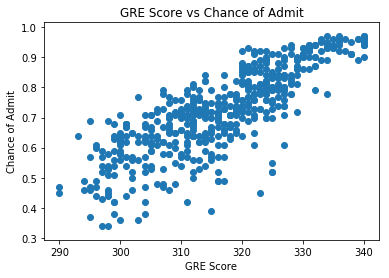

In [3]:
# Plot scatter plot and make sure it looks like a line.
plt.scatter(x,y)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title('GRE Score vs Chance of Admit')
plt.figure(figsize =(300,300))

## Sklearn Model (Training/Test Set)

In [4]:
# Split data set into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Reshape array for sklearn library
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [5]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# Get coefficient/slope and intercept.
inter = round(float(model.intercept_),5)
coef = round(float(model.coef_),5)

print('The linear regression model is y =',inter ,'+', coef,'x.')

The linear regression model is y = -2.41549 + 0.00992 x.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [6]:
# Get predicted values 
predictions = lm.predict(X_test)
predictions[0:10]

array([[0.67888715],
       [0.53011926],
       [0.72847645],
       [0.84749077],
       [0.5697907 ],
       [0.82765505],
       [0.55987284],
       [0.63921572],
       [0.69872287],
       [0.85740863]])

This is to check how well our model did compare to our original data.


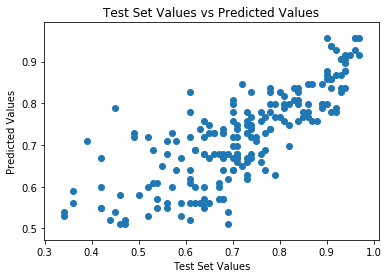

In [7]:
# Predicted Values vs Test Set Values
plt.scatter(y_test,predictions)
plt.xlabel("Test Set Values")
plt.ylabel("Predicted Values")
plt.title('Test Set Values vs Predicted Values')
plt.figure(figsize =(300,300))
print('This is to check how well our model did compare to our original data.')

In [8]:
# Coefficient of determination
coef_deter = model.score(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
print('The coefficient of determination is',round(coef_deter,2),'.')

The coefficient of determination is 0.66 .


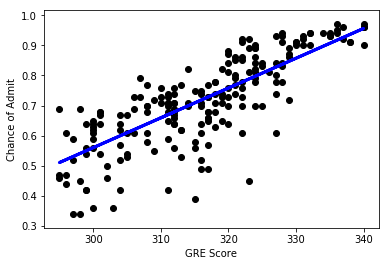

In [9]:
# Plot linear regression line on test set.
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.figure(figsize =(300,300))

## Scipy Model (Overfit on original data set)

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [11]:
print('Slope =',slope)
print('Intercept =',intercept)
print('Coefficient of Determination =',r_value)
print('P-value =',p_value)
print('Standard Error =',std_err)
print('\nOur linear regression model is y =',round(intercept,5),"+",round(slope,5),"x.")

Slope = 0.01012587106076459
Intercept = -2.482814666342291
Coefficient of Determination = 0.81035063546326
P-value = 1.088403686247757e-117
Standard Error = 0.00032809664528694833

Our linear regression model is y = -2.48281 + 0.01013 x.


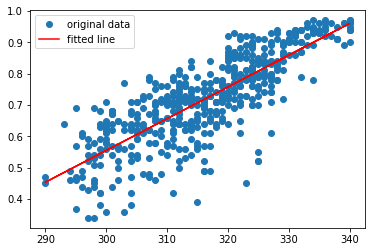

In [12]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()

## Comparison of Regression Models

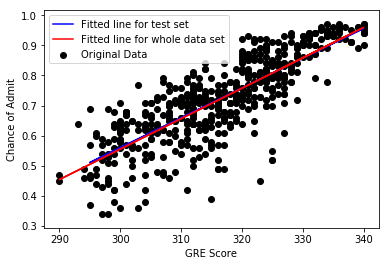

In [13]:
plt.scatter(x, y,  color='black',label ='Original Data')
plt.plot(X_test, predictions, color='blue',label = 'Fitted line for test set')
plt.plot(x, intercept + slope*x, 'red', label='Fitted line for whole data set')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.legend()
plt.figure(figsize =(400,400))

## Conclusion

&emsp;&emsp;For this analysis, we wanted to see if there is a linear relationship between GRE scores and chance of admittance into graduate school. Using two different kind of libraries, sklearn and scipy, we fitted two linear regression models. <br>
&emsp;&emsp;First, for sklearn, we split the data set into training and test sets. We fit a model on the training set and then use that model to get predicted values to compare with our test set. This method of training/test set is to make sure we do not overfit our original data set. Second, for scipy, we fitted a linear regression model on the whole data set and found a different linear regressison model. <br>
&emsp;&emsp;Using the coefficient of determinations from both sklearn and scipy, we find that scipy would be a better model in terms of the original data set. However, if we were to obtain new data, scipy model might underfit versus sklearn model which works better for new data. <br>
&emsp;&emsp;Our analysis shows that there is a positive linear relationship between GRE scores and chance of admit meaning higher GRE score equals better chance of admit. We might consider using transformation on our data set to possibly obtain a better model. Also, we will include other features to see what might be related to chance of admit.
  

# Multiple Linear Regression

In [14]:
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [76]:
# Take only continuous variables.
new_df = df.iloc[:,[1,2,4,5,6,8]]

# Feature scaling?
#standardized_X = preprocessing.scale(new_df)
#stand_X_df = pd.DataFrame(standardized_X,columns = new_df.columns.tolist())

new_df[0:10]

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65
5,330,115,4.5,3.0,9.34,0.90
6,321,109,3.0,4.0,8.20,0.75
7,308,101,3.0,4.0,7.90,0.68
8,302,102,2.0,1.5,8.00,0.50
9,323,108,3.5,3.0,8.60,0.45


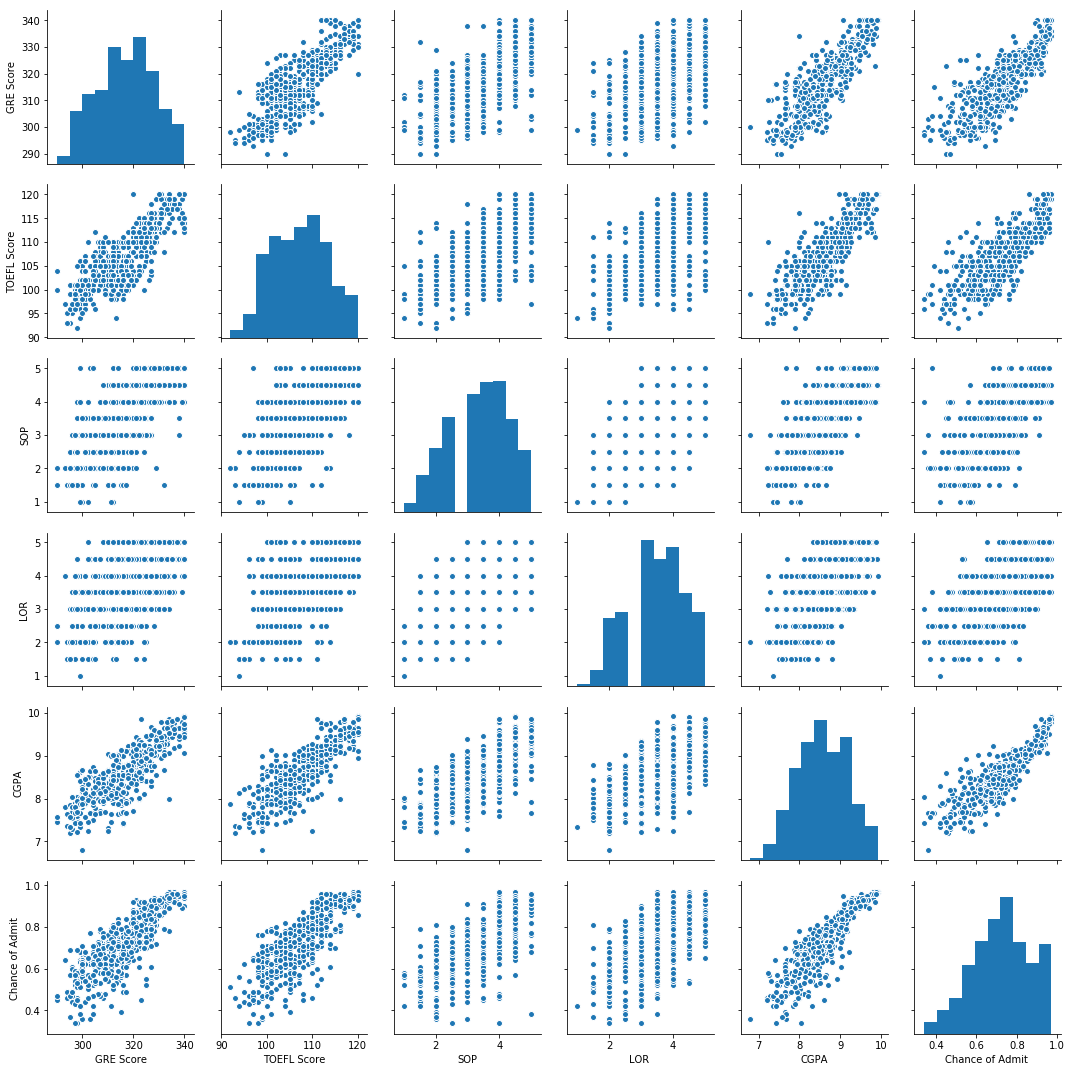

In [26]:
# Plot variables to see if they are normally distributed.
sns.pairplot(new_df)

In [71]:
# y = chance of admit and X = all other variables
big_X = new_df.iloc[:,0:5]
little_y = new_df.iloc[:,5]

train_X, test_X, train_y, test_y = train_test_split(big_X, little_y, test_size=0.4)

# Reshape array for sklearn library
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

In [63]:
# Fit model and obtain coefficients and intercept
multi_model = lm.fit(train_X,train_y)
m_coef = multi_model.coef_
m_int = multi_model.intercept_
print('Our multilinear model is y =',round(m_int,2),'+',round(m_coef[0],4),'X1 +',round(m_coef[1],4),
      'X2 +',round(m_coef[2],4),'X3 +',round(m_coef[3],3),'X4 +',round(m_coef[4],3),'X5.')


Our multilinear model is y = -1.42 + 0.0017 X1 + 0.0034 X2 + -0.001 X3 + 0.02 X4 + 0.136 X5.


In [37]:
# Obtain predicted values
preds = lm.predict(test_X)

Text(0.5,1,'Test vs predicted values')

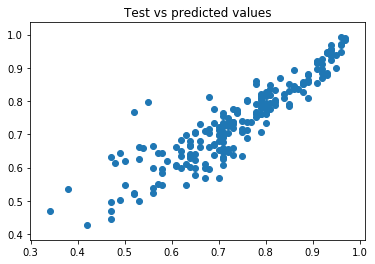

In [38]:
plt.scatter(test_y,preds)
plt.title('Test vs predicted values')

In [66]:
# Coefficient of determination
print('The coefficient of determination is',round(multi_model.score(big_X,little_y),4),'.')

The coefficient of determination is 0.814 .


Text(0.5,0,'Chance of Admit')

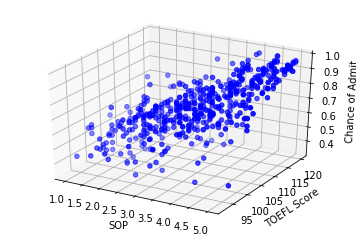

In [74]:
# Look at relationship between 3 variables.

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs = new_df['SOP'],ys = new_df['TOEFL Score'],
           zs = new_df.iloc[:,5],c = 'b')
ax.set_xlabel('SOP')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Chance of Admit')

## Conclusion

&emsp;&emsp;Adding more features to our model shows that there is more to being admitted to a college than GRE scores. Based on our pairplot, we can assume that there is positive correlation between chance of admit and all the independent variables. After fitting the model, we find that SOP (statement of purpose) may have a negative correlation with chance of admit. This could be due to outliers as shown in our 3D-plot. Chance of admission would be below zero only if an applicant does not obtain a score/rating for any of the variables (GRE,TOEFL,etc.) <br>
&emsp;&emsp;As stated before, feature scaling or transformation may have helped with fitting a better model, but overall, the fitted model works well as shown in the "Test vs predicted values" graph.